#Libraries and Data Load

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive

In [7]:
df = pd.read_csv('/content/application_data (1).csv')

In [8]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58223,167493,1,Cash loans,M,Y,N,0,67500.0,335592.0,26644.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58224,167496,0,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58225,167497,0,Cash loans,F,N,N,0,225000.0,1078200.0,34911.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58226,167498,0,Revolving loans,F,Y,N,0,90000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


1) Find all categorical variables

2) Find Count of instances in 0 and 1 class

3) Find % of instances in 0 and 1 class

4) Bar chart for both 2nd and 3rd

5) Find unique values in each column


#Understanding The Data

In [17]:
counter = 0
numerical_column = 0

for column in df.columns:
  if df[column].dtype in [int, float]:
    numerical_column +=1
  counter += 1

print('number of columns are:', counter)
print('number of numerical columns:', numerical_column)

number of columns are: 122
number of numerical columns: 106


In [18]:
count_class_0 = 0
count_class_1 = 0

for index, row in df.iterrows():
    if row['TARGET'] == 0:
        count_class_0 += 1
    elif row['TARGET'] == 1:
        count_class_1 += 1

print("Number of rows with class 0:", count_class_0)
print("Number of rows with class 1:", count_class_1)


Number of rows with class 0: 53543
Number of rows with class 1: 4685


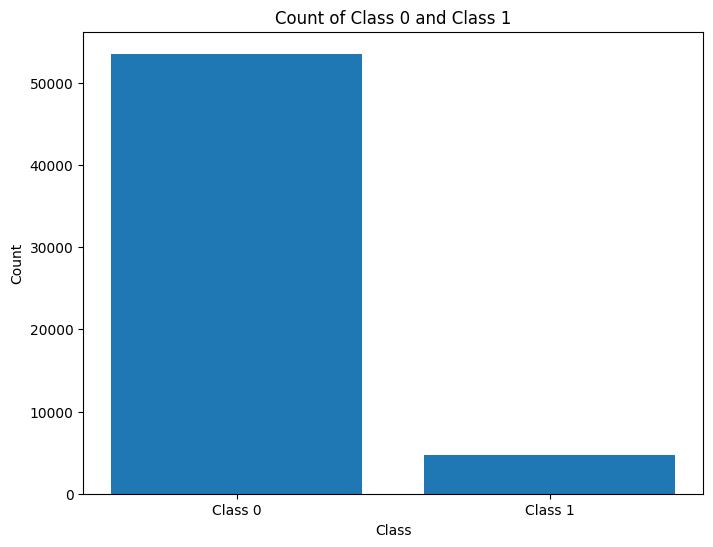

In [19]:
# Bar chart for counts
labels = ['Class 0', 'Class 1']
counts = [count_class_0, count_class_1]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Class 0 and Class 1')
plt.show()

percent of vals are [91.95404272858418, 8.045957271415814]




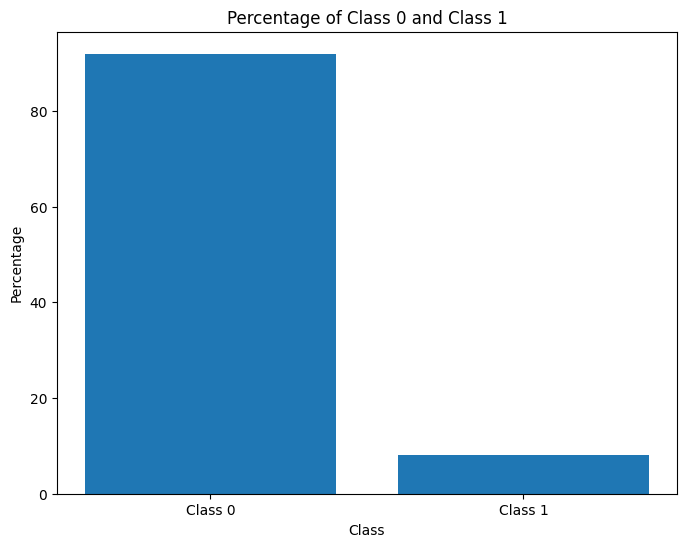

In [20]:
# Bar chart for percentages
total = count_class_0 + count_class_1
percentages = [count_class_0 / total * 100, count_class_1 / total * 100]

print('percent of vals are', percentages)
print('')
print('')
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Class 0 and Class 1')
plt.show()

In [21]:
for column in df.columns:
  unique_values_count = df[column].nunique()
  print("Number of unique values in", column, "is", unique_values_count)


Number of unique values in SK_ID_CURR is 58228
Number of unique values in TARGET is 2
Number of unique values in NAME_CONTRACT_TYPE is 2
Number of unique values in CODE_GENDER is 3
Number of unique values in FLAG_OWN_CAR is 2
Number of unique values in FLAG_OWN_REALTY is 2
Number of unique values in CNT_CHILDREN is 11
Number of unique values in AMT_INCOME_TOTAL is 885
Number of unique values in AMT_CREDIT is 3579
Number of unique values in AMT_ANNUITY is 9250
Number of unique values in AMT_GOODS_PRICE is 538
Number of unique values in NAME_TYPE_SUITE is 7
Number of unique values in NAME_INCOME_TYPE is 8
Number of unique values in NAME_EDUCATION_TYPE is 5
Number of unique values in NAME_FAMILY_STATUS is 6
Number of unique values in NAME_HOUSING_TYPE is 6
Number of unique values in REGION_POPULATION_RELATIVE is 81
Number of unique values in DAYS_BIRTH is 16167
Number of unique values in DAYS_EMPLOYED is 8485
Number of unique values in DAYS_REGISTRATION is 13059
Number of unique values in

6) Find how many nan values in each column

7) Preprocessing for each column differently according to the nan values in each column

In [22]:
nan_values_count = {}

for column in df.columns:
  if (df[column].isnull().sum()!=0):
    nan_values_count[column] = df[column].isnull().sum()

print("Number of NaN values in each column:")
for column, count in nan_values_count.items():
    print(f"{column}: {count}")


Number of NaN values in each column:


In [23]:
print("\nFilling NaN values:")
for column, count in nan_values_count.items():
    if df[column].dtype == 'object':
        most_frequent_value = df[column].mode().values[0]
        df[column].fillna(most_frequent_value, inplace=True)
        print(f"Filled NaN values in {column} with the most frequent value: {most_frequent_value}")
    else:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
        print(f"Filled NaN values in {column} with the mean value: {mean_value}")


Filling NaN values:


In [24]:
nan_values_count = {}

for column in df.columns:
  if (df[column].isnull().sum()!=0):
    nan_values_count[column] = df[column].isnull().sum()

print("Number of NaN values in each column:")
for column, count in nan_values_count.items():
    print(f"{column}: {count}")


Number of NaN values in each column:


#Data Preprocessing

After 6th point

Find the name of the columns above 50% missing values and remove them from data frame

 Once you remove again print out the missing values in each column and try to see columns above 45% missing values can be removed or not based on importance

In [25]:
nan_threshold = 50  # Set the threshold percentage for NaN values

# Calculate the percentage of NaN values in each column
nan_values_percentage = (df.isnull().sum() / len(df)) * 100

# Create a list of column names with less than or equal to the threshold percentage of NaN values
selected_columns = nan_values_percentage[nan_values_percentage <= nan_threshold].index.tolist()

# Create the modified DataFrame with selected columns
dfNew = df[selected_columns].copy()
dfNew

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,0.000000,0.000000,0.000000,0.007118,0.007752,0.032953,0.270085,0.262293,1.882485
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58223,167493,1,Cash loans,M,Y,N,0,67500.0,335592.0,26644.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
58224,167496,0,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58225,167497,0,Cash loans,F,N,N,0,225000.0,1078200.0,34911.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58226,167498,0,Revolving loans,F,Y,N,0,90000.0,180000.0,9000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [26]:
nan_values_percentage = (dfNew.isnull().sum() / len(dfNew)) * 100
nan_values_percentage = nan_values_percentage.round(2)  # Round the percentages to 2 decimal places

print("Column\t\tNaN Values Percentage")
for column, percentage in nan_values_percentage.iteritems():
    print(f"{column}\t\t{percentage}%")

Column		NaN Values Percentage
SK_ID_CURR		0.0%
TARGET		0.0%
NAME_CONTRACT_TYPE		0.0%
CODE_GENDER		0.0%
FLAG_OWN_CAR		0.0%
FLAG_OWN_REALTY		0.0%
CNT_CHILDREN		0.0%
AMT_INCOME_TOTAL		0.0%
AMT_CREDIT		0.0%
AMT_ANNUITY		0.0%
AMT_GOODS_PRICE		0.0%
NAME_TYPE_SUITE		0.0%
NAME_INCOME_TYPE		0.0%
NAME_EDUCATION_TYPE		0.0%
NAME_FAMILY_STATUS		0.0%
NAME_HOUSING_TYPE		0.0%
REGION_POPULATION_RELATIVE		0.0%
DAYS_BIRTH		0.0%
DAYS_EMPLOYED		0.0%
DAYS_REGISTRATION		0.0%
DAYS_ID_PUBLISH		0.0%
OWN_CAR_AGE		0.0%
FLAG_MOBIL		0.0%
FLAG_EMP_PHONE		0.0%
FLAG_WORK_PHONE		0.0%
FLAG_CONT_MOBILE		0.0%
FLAG_PHONE		0.0%
FLAG_EMAIL		0.0%
OCCUPATION_TYPE		0.0%
CNT_FAM_MEMBERS		0.0%
REGION_RATING_CLIENT		0.0%
REGION_RATING_CLIENT_W_CITY		0.0%
WEEKDAY_APPR_PROCESS_START		0.0%
HOUR_APPR_PROCESS_START		0.0%
REG_REGION_NOT_LIVE_REGION		0.0%
REG_REGION_NOT_WORK_REGION		0.0%
LIVE_REGION_NOT_WORK_REGION		0.0%
REG_CITY_NOT_LIVE_CITY		0.0%
REG_CITY_NOT_WORK_CITY		0.0%
LIVE_CITY_NOT_WORK_CITY		0.0%
ORGANIZATION_TYPE		0.0%
EXT_SO

<ipython-input-26-4d0e110acf0c>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in nan_values_percentage.iteritems():


In [27]:
nan_values_percentage = (dfNew.isnull().sum() / len(dfNew)) * 100
nan_values_percentage = nan_values_percentage.round(2)  # Round the percentages to 2 decimal places

nan_dict = nan_values_percentage.to_dict()

# Sort the dictionary by values in ascending order
sorted_nan_dict = {k: v for k, v in sorted(nan_dict.items(), key=lambda item: item[1])}

print("Dictionary with Column Name as Key and NaN Percentage as Value (Sorted):")
print(sorted_nan_dict)

Dictionary with Column Name as Key and NaN Percentage as Value (Sorted):
{'SK_ID_CURR': 0.0, 'TARGET': 0.0, 'NAME_CONTRACT_TYPE': 0.0, 'CODE_GENDER': 0.0, 'FLAG_OWN_CAR': 0.0, 'FLAG_OWN_REALTY': 0.0, 'CNT_CHILDREN': 0.0, 'AMT_INCOME_TOTAL': 0.0, 'AMT_CREDIT': 0.0, 'AMT_ANNUITY': 0.0, 'AMT_GOODS_PRICE': 0.0, 'NAME_TYPE_SUITE': 0.0, 'NAME_INCOME_TYPE': 0.0, 'NAME_EDUCATION_TYPE': 0.0, 'NAME_FAMILY_STATUS': 0.0, 'NAME_HOUSING_TYPE': 0.0, 'REGION_POPULATION_RELATIVE': 0.0, 'DAYS_BIRTH': 0.0, 'DAYS_EMPLOYED': 0.0, 'DAYS_REGISTRATION': 0.0, 'DAYS_ID_PUBLISH': 0.0, 'OWN_CAR_AGE': 0.0, 'FLAG_MOBIL': 0.0, 'FLAG_EMP_PHONE': 0.0, 'FLAG_WORK_PHONE': 0.0, 'FLAG_CONT_MOBILE': 0.0, 'FLAG_PHONE': 0.0, 'FLAG_EMAIL': 0.0, 'OCCUPATION_TYPE': 0.0, 'CNT_FAM_MEMBERS': 0.0, 'REGION_RATING_CLIENT': 0.0, 'REGION_RATING_CLIENT_W_CITY': 0.0, 'WEEKDAY_APPR_PROCESS_START': 0.0, 'HOUR_APPR_PROCESS_START': 0.0, 'REG_REGION_NOT_LIVE_REGION': 0.0, 'REG_REGION_NOT_WORK_REGION': 0.0, 'LIVE_REGION_NOT_WORK_REGION': 0.0, 

In [28]:
for key, value in sorted_nan_dict.items():
    if value >= 40:
        print(f"Key: {key}, Value: {value}")

###8) As all remaining columns with missing value above 40% are normalized we need to remove them as their is no way to substitute values in them

In [29]:
# Drop multiple columns
dfNew = dfNew.drop(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','OCCUPATION_TYPE'], axis=1)

9) Analysis of OCCUPATION_TYPE do a plot showing count of each category

10) which category comes the most in OCCUPATION_TYPE  column

11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE   column

In [30]:
dfNew

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000000,0.000000,0.000000,0.000000,0.007118,0.007752,0.032953,0.270085,0.262293,1.882485
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58223,167493,1,Cash loans,M,Y,N,0,67500.0,335592.0,26644.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
58224,167496,0,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58225,167497,0,Cash loans,F,N,N,0,225000.0,1078200.0,34911.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58226,167498,0,Revolving loans,F,Y,N,0,90000.0,180000.0,9000.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [34]:
# Create a dictionary to store the column names and NaN counts
nan_counts = {'Column Name': [], 'NaN Count': []}

# Iterate over the columns in dfNew and calculate the NaN counts
for column in dfNew.columns:
    nan_count = dfNew[column].isnull().sum()
    if nan_count > 0:
        nan_counts['Column Name'].append(column)
        nan_counts['NaN Count'].append(nan_count)

# Create a new DataFrame from the nan_counts dictionary
nan_df = pd.DataFrame(nan_counts)

# Display only the columns with NaN counts greater than 0
nan_df = nan_df[nan_df['NaN Count'] > 0]

# Print the resulting DataFrame
print(nan_df)


Empty DataFrame
Columns: [Column Name, NaN Count]
Index: []


In [33]:
# Display the part of dfNew with column names equal to nan_df['Column Name']
subset_df = dfNew[nan_df['Column Name']]
(subset_df)

""
0
1
2
3
4
...
58223
58224
58225
58226


#MODELS
apply

Random Forest, ANN,KNN,SVM and logistic regression and compare results using a bar chart for each model